<a href="https://colab.research.google.com/github/scottthomaswx/OutlookPlotter/blob/main/Outlook_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Needed Code

In [48]:
# @title
%%capture
!pip install geopandas
!pip install metpy
!pip install matplotlib
!pip install cartopy
!pip install pandas
!pip install datetime
!pip install numpy
import geopandas
import metpy
from metpy.plots import PlotGeometry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from metpy.plots import USCOUNTIES
import matplotlib.patches as mpatches
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

Times for Outlook Issuances. For archived. UTC Unless Otherwise Specified

Day                | SPC Convective                    |
-------------------|-----------------------------------|
Day 1              | 1200 (6z), 1300, 1630, 2000, 0100 |


In [74]:
# @markdown ### Enter Information For Day 1
# @markdown ##### Month and Day Must Be 2 Digits
year = '2025' # @param {type:"string"}
month = '04' # @param {type:"string"}
day = '02' # @param {type:"string"}
time = '1630' # @param {type:"string"}
WestLong = -100 # @param {type:"integer"}
EastLong = -75 # @param {type:"integer"}
NorthLat = 48 # @param {type:"integer"}
SouthLat = 33 # @param {type:"integer"}

#Pull Data Shapefiles

In [84]:
# @title
base_date_time = datetime(int(year), int(month), int(day))
day2 = base_date_time - timedelta(days=1)
day3 = base_date_time - timedelta(days=2)
day4 = base_date_time - timedelta(days=3)
day5 = base_date_time - timedelta(days=4)
day6 = base_date_time - timedelta(days=5)
day7 = base_date_time - timedelta(days=6)
day8 = base_date_time - timedelta(days=7)

warn_end_date = base_date_time + timedelta(days = 1)
warn_end_year = warn_end_date.year
warn_end_month = warn_end_date.month
if warn_end_month < 10:
  warn_end_month = '0' + str(warn_end_month)
elif warn_end_month > 10:
  warn_end_month = str(warn_end_month)
warn_end_day = warn_end_date.day
if warn_end_day < 10:
  warn_end_day = '0' + str(warn_end_day)
elif warn_end_day > 10:
  warn_end_day = str(warn_end_day)

Begins = f'{year}-{month}-{day}T12:00'
Ends = f'{warn_end_year}-{warn_end_month}-{warn_end_day}T12:00'



d2_year = int(day2.year)
d2_month = int(day2.month)
d2_day = int(day2.day)
if d2_month < 10:
  d2_month = '0' + str(d2_month)
elif d2_month > 10:
  d2_month = str(d2_month)
if d2_day < 10:
  d2_day = '0' + str(d2_day)
elif d2_day > 10:
  d2_day = str(d2_day)

d3_year = int(day3.year)
d3_month = int(day3.month)
d3_day = int(day3.day)
if d3_month < 10:
  d3_month = '0' + str(d3_month)
elif d3_month > 10:
  d3_month = str(d3_month)
if d3_day < 10:
  d3_day = '0' + str(d3_day)
elif d3_day > 10:
  d3_day = str(d3_day)

d4_year = int(day4.year)
d4_month = int(day4.month)
d4_day = int(day4.day)
if d4_month < 10:
  d4_month = '0' + str(d4_month)
elif d4_month > 10:
  d4_month = str(d4_month)
if d4_day < 10:
  d4_day = '0' + str(d4_day)
elif d4_day > 10:
  d4_day = str(d4_day)

d5_year = int(day5.year)
d5_month = int(day5.month)
d5_day = int(day5.day)
if d5_month < 10:
  d5_month = '0' + str(d5_month)
elif d5_month > 10:
  d5_month = str(d5_month)
if d5_day < 10:
  d5_day = '0' + str(d5_day)
elif d5_day > 10:
  d5_day = str(d5_day)

d6_year = int(day6.year)
d6_month = int(day6.month)
d6_day = int(day6.day)
if d6_month < 10:
  d6_month = '0' + str(d6_month)
elif d6_month > 10:
  d6_month = str(d6_month)
if d6_day < 10:
  d6_day = '0' + str(d6_day)
elif d6_day > 10:
  d6_day = str(d6_day)

d7_year = int(day7.year)
d7_month = int(day7.month)
d7_day = int(day7.day)
if d7_month < 10:
  d7_month = '0' + str(d7_month)
elif d7_month > 10:
  d7_month = str(d7_month)
if d7_day < 10:
  d7_day = '0' + str(d7_day)
elif d7_day > 10:
  d7_day = str(d7_day)

d8_year = int(day8.year)
d8_month = int(day8.month)
d8_day = int(day8.day)
if d8_month < 10:
  d8_month = '0' + str(d8_month)
elif d8_month > 10:
  d8_month = str(d8_month)
if d8_day < 10:
  d8_day = '0' + str(d8_day)
elif d8_day > 10:
  d8_day = str(d8_day)

d1outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{year}/day1otlk_{year}{month}{day}_{time}_cat.lyr.geojson')
d2outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{d2_year}/day2otlk_{d2_year}{d2_month}{d2_day}_1730_cat.lyr.geojson')
d3outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/outlook/archive/{d3_year}/day3otlk_{d3_year}{d3_month}{d3_day}_1930_cat.lyr.geojson')

d4outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{d4_year}/day4prob_{d4_year}{d4_month}{d4_day}.lyr.geojson')
d5outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{d5_year}/day5prob_{d5_year}{d5_month}{d5_day}.lyr.geojson')
d6outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{d6_year}/day6prob_{d6_year}{d6_month}{d6_day}.lyr.geojson')
d7outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{d7_year}/day7prob_{d7_year}{d7_month}{d7_day}.lyr.geojson')
d8outlook = geopandas.read_file(f'https://www.spc.noaa.gov/products/exper/day4-8/archive/{d8_year}/day8prob_{d8_year}{d8_month}{d8_day}.lyr.geojson')

data = {'TYPECODE': [],
        'MAG': [],
        'PHENOM': [],
        'SIG': [],
        'phenomena': [],
        'geometry': []}
try:
  Warn1 = geopandas.read_file('https://mesonet.agron.iastate.edu/api/1/cow.json?begints='+Begins+':00Z&endts='+Ends+':00Z&hailsize=1&wind=58&phenomena=TO&phenomena=SV&phenomena=MA&phenomena=FF&phenomena=DS&lsrtype=T&lsrtype=D&lsrtype=H&lsrtype=G&lsrtype=MA&lsrtype=FF&lsrtype=DS&lsrbuffer=15&warningbuffer=1')
except:
  Warn1 = pd.DataFrame(data)

try:
  LSR1 = 'https://mesonet.agron.iastate.edu/cgi-bin/request/gis/lsr.py?sts='+Begins+'Z&ets='+Ends+'Z&fmt=csv'
  LSR1File = pd.read_csv(LSR1, on_bad_lines='skip')
except:
  LSR1File = pd.DataFrame(data)

TORWarn = Warn1.query('phenomena == "TO"')
SVRWarn = Warn1.query('phenomena == "SV"')

LSR1File['MAG'] = LSR1File['MAG'].replace('None', np.nan)
LSR1File['MAG'] = LSR1File['MAG'].astype(float)

TORSR = LSR1File.query('TYPECODE == "T"')
TSGSR = LSR1File.query('TYPECODE == "G" & MAG >= 58')
HALSR = LSR1File.query('TYPECODE == "H" & MAG >= 1.0')
TSDSR = LSR1File.query('TYPECODE == "D"')
MTGSR = LSR1File.query('TYPECODE == "M" & MAG >= 58')

Warngeo = PlotGeometry()
Warngeo.geometry = Warn1['geometry']

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'pyogrio_48658e1f304447f489f615ee68f160e8': 'events' (default), 'stormreports'. Specify layer parameter to avoid this warning.
  result = read_func(


#Create Figure

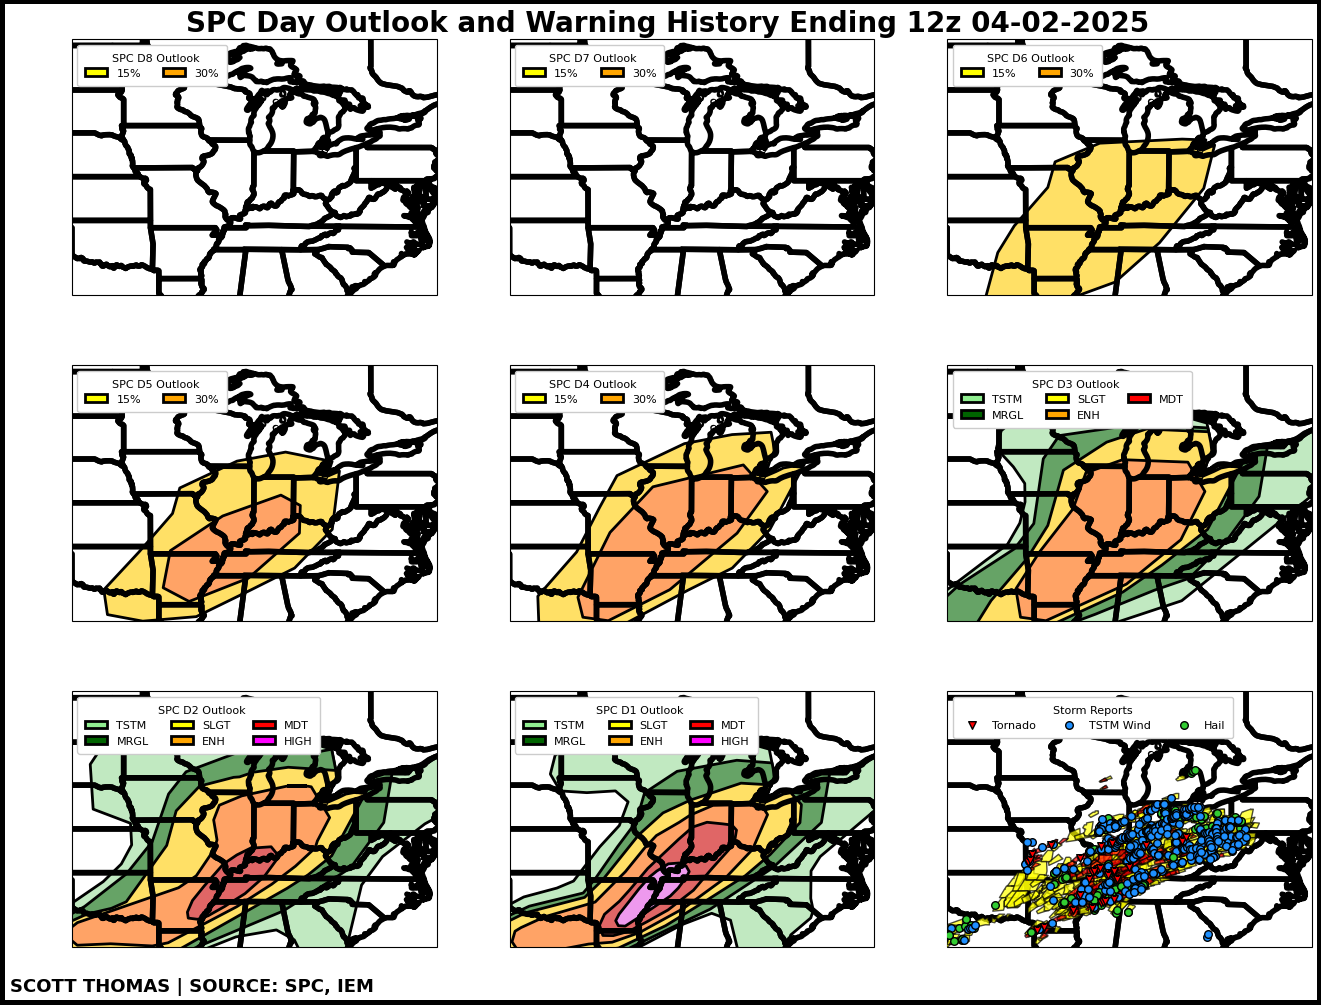

In [86]:
# @title
fig = plt.figure(figsize=(16, 12), facecolor='white', edgecolor="black", linewidth =6)

ax1 = plt.subplot(3, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines(color='black',resolution='10m',zorder=99)
ax1.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax1.add_geometries(d8outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[0], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[1], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[2], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[3], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[4], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[5], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[6], edgecolor='black', linewidth=2)
  ax1.add_geometries(d8outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d8outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
ax1.legend([SLGT, ENHC], ['15%', '30%'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D8 Outlook', title_fontsize=8).set_zorder(10)
ax1.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax1.set_box_aspect(0.7)

ax2 = plt.subplot(3, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines(color='black',resolution='10m',zorder=99)
ax2.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax2.add_geometries(d7outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[0], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[1], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[2], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[3], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[4], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[5], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[6], edgecolor='black', linewidth=2)
  ax2.add_geometries(d7outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d7outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
ax2.legend([SLGT, ENHC], ['15%', '30%'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D7 Outlook', title_fontsize=8).set_zorder(10)
ax2.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax2.set_box_aspect(0.7)

ax3 = plt.subplot(3, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines(color='black',resolution='10m',zorder=99)
ax3.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax3.add_geometries(d6outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[0], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[1], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[2], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[3], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[4], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[5], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[6], edgecolor='black', linewidth=2)
  ax3.add_geometries(d6outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d6outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
ax3.legend([SLGT, ENHC], ['15%', '30%'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D6 Outlook', title_fontsize=8).set_zorder(10)
ax3.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax3.set_box_aspect(0.7)

ax4 = plt.subplot(3, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines(color='black',resolution='10m',zorder=99)
ax4.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax4.add_geometries(d5outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[0], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[1], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[2], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[3], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[4], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[5], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[6], edgecolor='black', linewidth=2)
  ax4.add_geometries(d5outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d5outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
ax4.legend([SLGT, ENHC], ['15%', '30%'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D5 Outlook', title_fontsize=8).set_zorder(10)
ax4.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax4.set_box_aspect(0.7)

ax5 = plt.subplot(3, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines(color='black',resolution='10m',zorder=99)
ax5.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax5.add_geometries(d4outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[0], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[1], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[2], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[3], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[4], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[5], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[6], edgecolor='black', linewidth=2)
  ax5.add_geometries(d4outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d4outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
ax5.legend([SLGT, ENHC], ['15%', '30%'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D4 Outlook', title_fontsize=8).set_zorder(10)
ax5.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax5.set_box_aspect(0.7)

ax6 = plt.subplot(3, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines(color='black',resolution='10m',zorder=99)
ax6.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
    ax6.add_geometries(d3outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[0], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[1], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[2], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[3], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[4], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[5], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[6], edgecolor='black', linewidth=2)
    ax6.add_geometries(d3outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d3outlook.fill[7], edgecolor='black', linewidth=2)
except:
    pass
TSTM = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='lightgreen')
MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
ax6.legend([TSTM, MRGL, SLGT, ENHC, MODT], ['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D3 Outlook', title_fontsize=8).set_zorder(10)
ax6.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax6.set_box_aspect(0.7)

ax7 = plt.subplot(3, 3, 7, projection=ccrs.PlateCarree())
ax7.coastlines(color='black',resolution='10m',zorder=99)
ax7.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax7.add_geometries(d2outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[0], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[1], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[2], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[3], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[4], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[5], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[6], edgecolor='black', linewidth=2)
  ax7.add_geometries(d2outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d2outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
TSTM = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='lightgreen')
MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
HIGH = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='magenta')
ax7.legend([TSTM, MRGL, SLGT, ENHC, MODT, HIGH], ['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT', 'HIGH'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D2 Outlook', title_fontsize=8).set_zorder(10)
ax7.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax7.set_box_aspect(0.7)

ax8 = plt.subplot(3, 3, 8, projection=ccrs.PlateCarree())
ax8.coastlines(color='black',resolution='10m',zorder=99)
ax8.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax8.add_geometries(d1outlook.geometry[0], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[0], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[1], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[1], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[2], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[2], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[3], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[3], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[4], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[4], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[5], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[5], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[6], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[6], edgecolor='black', linewidth=2)
  ax8.add_geometries(d1outlook.geometry[7], crs=ccrs.PlateCarree(), facecolor=d1outlook.fill[7], edgecolor='black', linewidth=2)
except:
  pass
TSTM = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='lightgreen')
MRGL = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkgreen')
SLGT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='yellow')
ENHC = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='orange')
MODT = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='red')
HIGH = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='magenta')
ax8.legend([TSTM, MRGL, SLGT, ENHC, MODT, HIGH], ['TSTM', 'MRGL', 'SLGT', 'ENH', 'MDT', 'HIGH'],
          loc='upper left', fontsize=8, facecolor='white', markerscale=8, ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='  SPC D1 Outlook', title_fontsize=8).set_zorder(10)
ax8.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax8.set_box_aspect(0.7)

ax9 = plt.subplot(3, 3, 9, projection=ccrs.PlateCarree())
ax9.coastlines(color='black',resolution='10m',zorder=99)
ax9.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9, linewidth = 4)
try:
  ax9.add_geometries(TORWarn.geometry, crs = ccrs.PlateCarree(), facecolor =  'red', edgecolor = 'black', zorder = 998, alpha = 0.7)
  ax9.add_geometries(SVRWarn.geometry, crs = ccrs.PlateCarree(), facecolor =  'yellow', edgecolor = 'black', zorder = 997, alpha = 0.7)
except:
  pass

ax9.scatter(y = TORSR['LAT'], x = TORSR['LON'], zorder=1001, color = 'red', marker = 'v', edgecolor = 'black', label = 'Tornado', s = 30)
ax9.scatter(y = TSGSR['LAT'], x = TSGSR['LON'], zorder=1000, color = 'dodgerblue', label = 'TSTM Wind', s = 30, edgecolor = 'black')
ax9.scatter(y = HALSR['LAT'], x = HALSR['LON'], zorder=1000, color = 'limegreen', label = 'Hail', s = 30, edgecolor = 'black')
ax9.scatter(y = MTGSR['LAT'], x = MTGSR['LON'], zorder=999, color = 'dodgerblue', s = 30, edgecolor = 'black')
ax9.scatter(y = TSDSR['LAT'], x = TSDSR['LON'], zorder=1000, color = 'dodgerblue', s = 30, edgecolor = 'black')

ax9.legend(loc='upper left',
          fontsize=8, facecolor='white', ncol=3, framealpha=1.0,
          labelcolor='k', borderpad=0.7,
          title='Storm Reports', title_fontsize=8).set_zorder(9999)
ax9.set_extent((WestLong, EastLong, SouthLat, NorthLat))
ax9.set_box_aspect(0.7)

plt.figtext(0.50, 0.88, f'SPC Day Outlook and Warning History Ending 12z {month}-{day}-{year} ', ha='center', weight='bold', fontsize=20)
plt.figtext(0.20, 0.08, f'SCOTT THOMAS | SOURCE: SPC, IEM', weight='bold', color='black', fontsize=13, ha='center')
plt.savefig(f'SPC_History_ConvectiveOutlook_{year}_{month}_{day}_{time}.png', bbox_inches = 'tight')